<a href="https://colab.research.google.com/github/SHREERAJ11/SafeWaters/blob/main/Model/Understanding_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Define paths to the dataset folders
data_path = '/content/gdrive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 2'
image_folders = {
    'train': os.path.join(data_path, 'Images', 'Train_Image'),
    'valid': os.path.join(data_path, 'Images', 'Valid_Image'),
    'test': os.path.join(data_path, 'Images', 'Test_Image')
}
question_files = {
    'train': os.path.join(data_path, 'Questions', 'Training Question.json'),
    'valid': os.path.join(data_path, 'Questions', 'Valid Question.json'),
    'test': os.path.join(data_path, 'Questions', 'Test_Question.json')
}

In [ ]:
# Function to load JSON data
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [ ]:
# Load question data
questions = {key: load_json(path) for key, path in question_files.items()}

In [ ]:
# Function to display an image with its question and ground truth (if available)
def display_image_with_question(image_folder, image_id, question_data):
    image_path = os.path.join(image_folder, image_id)
    img = mpimg.imread(image_path)

    # Find the corresponding question info based on the Image_ID
    question_info = next((item for item in question_data.values() if item["Image_ID"] == image_id), None)
    if question_info is None:
        print(f"No question found for image {image_id}")
        return

    question = question_info['Question']
    question_type = question_info['Question_Type']
    ground_truth = question_info.get('Ground_Truth', 'N/A')

    # Display the image with its metadata
    plt.imshow(img)
    plt.title(f"Question: {question}\nGround Truth: {ground_truth}\nType: {question_type}")
    plt.axis('off')
    plt.show()


Displaying train images...


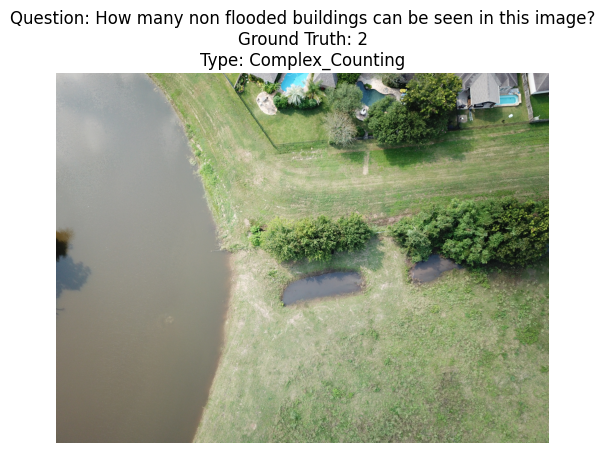

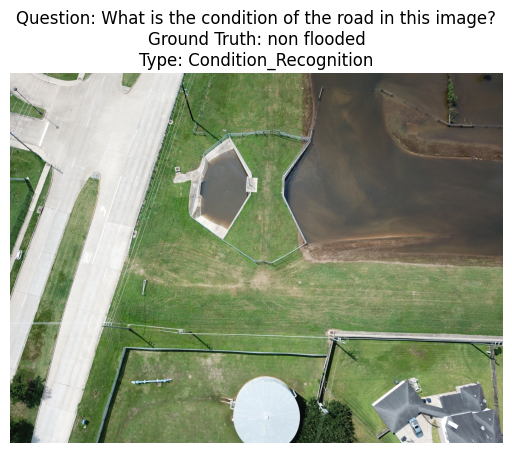

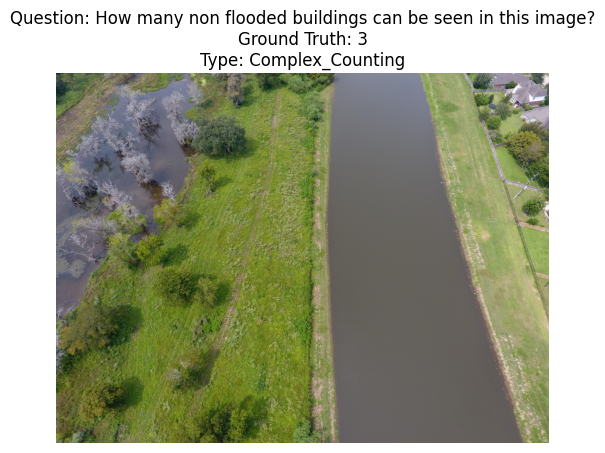

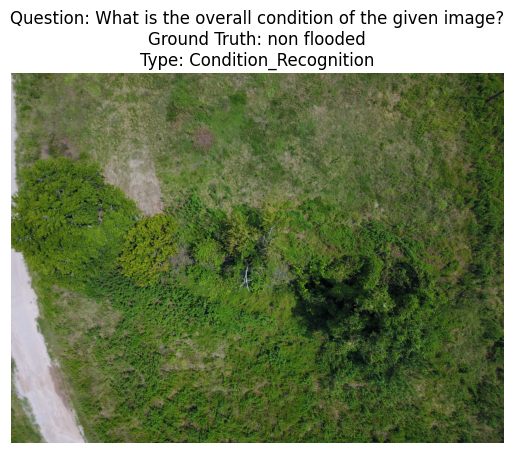

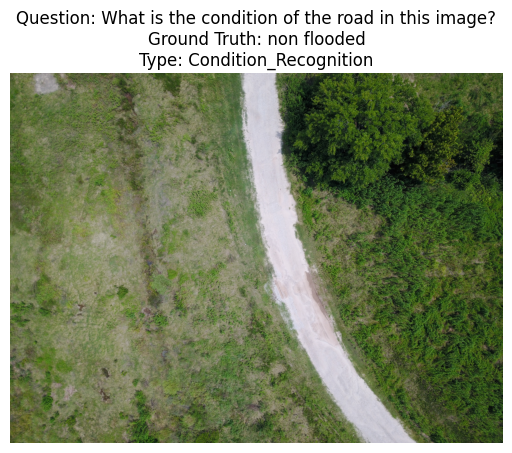

Displaying valid images...


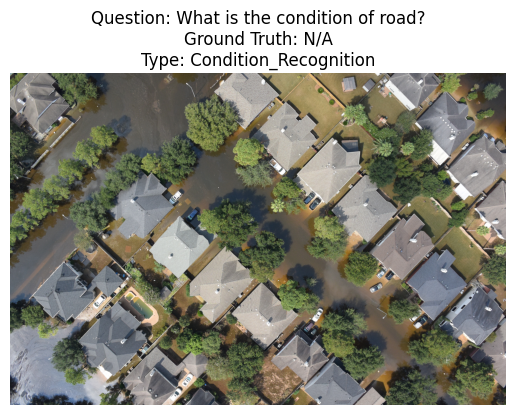

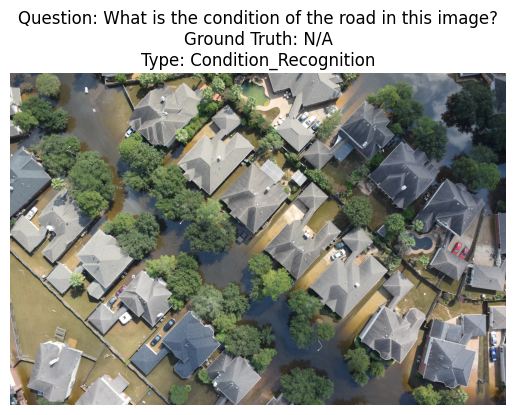

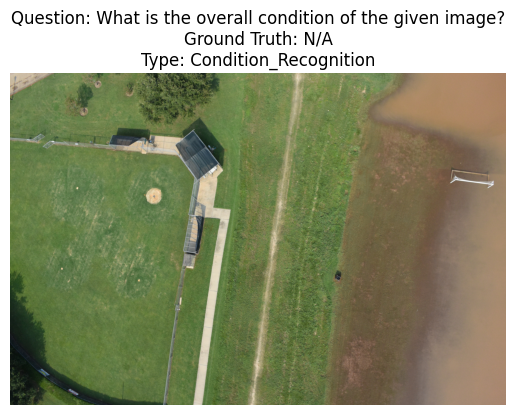

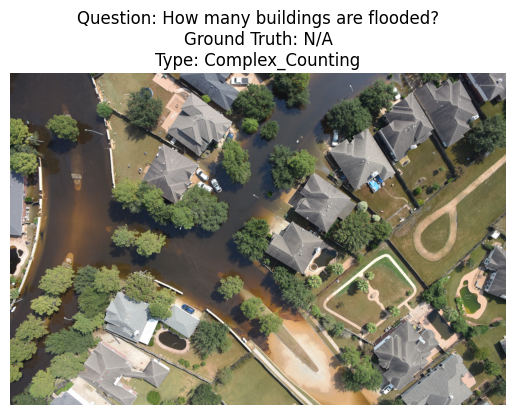

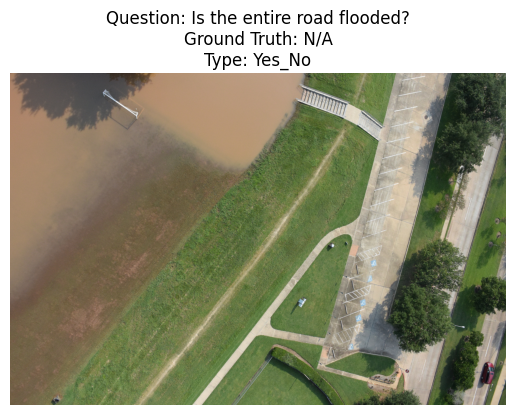

Displaying test images...


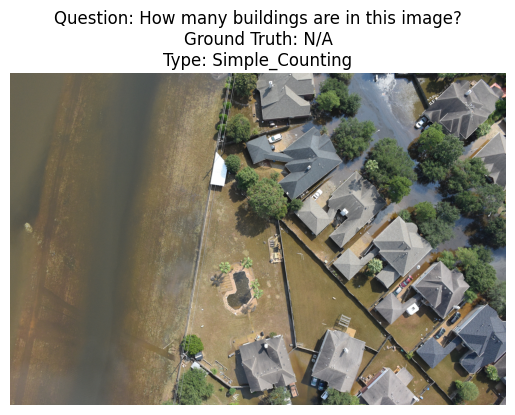

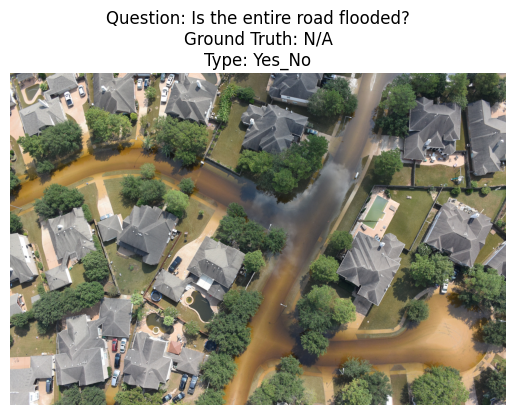

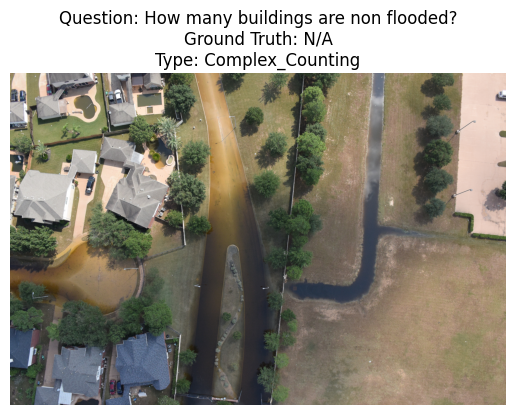

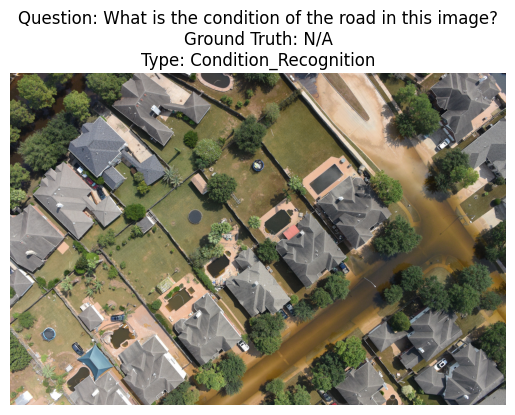

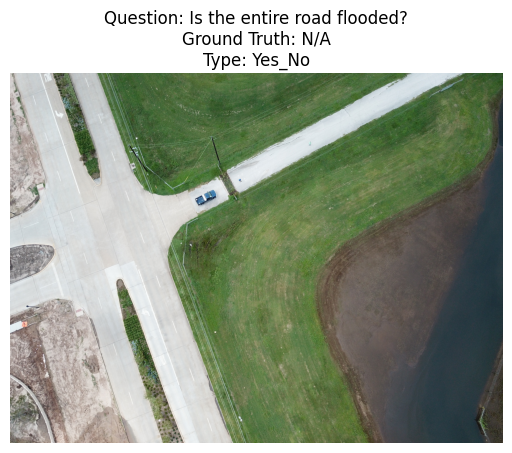

In [ ]:
# Example of displaying some images with their questions and ground truths (if available)
for key in image_folders.keys():
    print(f"Displaying {key} images...")
    for image_id in os.listdir(image_folders[key])[:5]:  # Display first 5 images
        display_image_with_question(image_folders[key], image_id, questions[key])

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Function to get the distribution of question types
def get_question_type_distribution(question_data):
    question_types = [item['Question_Type'] for item in question_data.values()]
    return Counter(question_types)

In [ ]:
# Function to get the distribution of ground truths
def get_ground_truth_distribution(question_data):
    ground_truths = [item['Ground_Truth'] for item in question_data.values() if 'Ground_Truth' in item]
    return Counter(ground_truths)


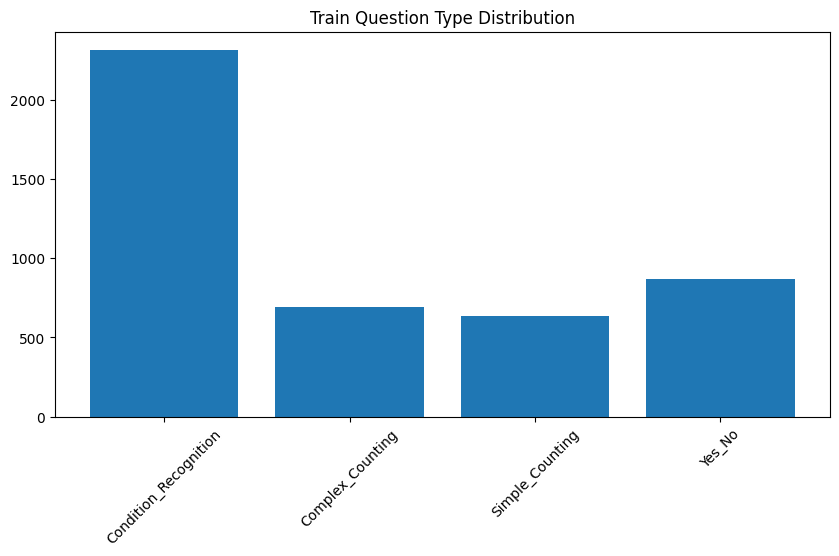

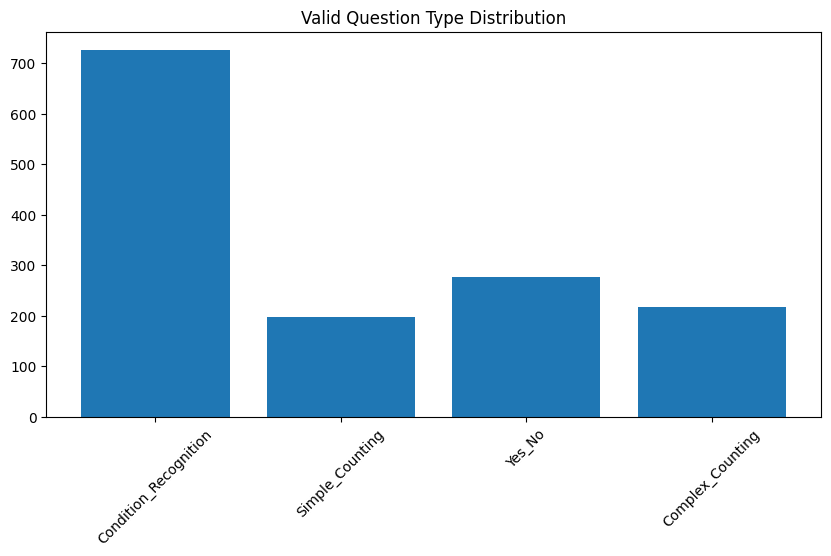

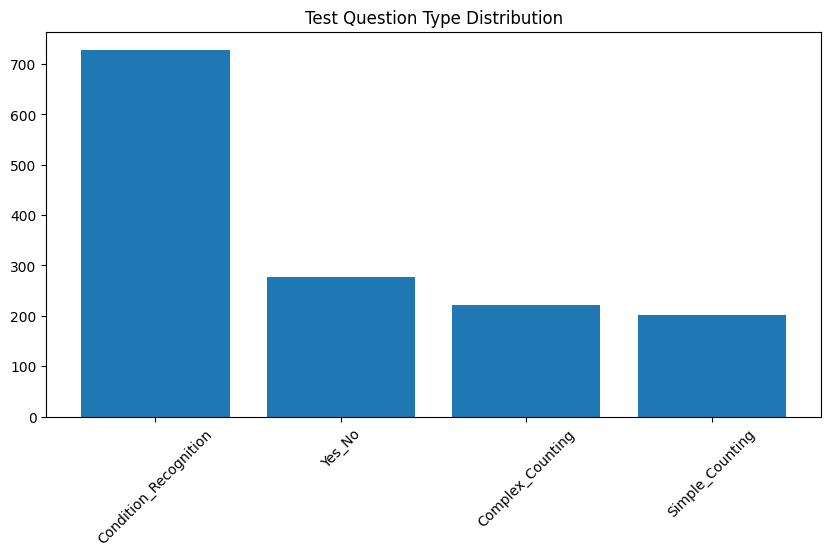

In [ ]:
# Display question type distribution
for key in questions.keys():
    question_type_distribution = get_question_type_distribution(questions[key])
    plt.figure(figsize=(10, 5))
    plt.bar(question_type_distribution.keys(), question_type_distribution.values())
    plt.title(f'{key.capitalize()} Question Type Distribution')
    plt.xticks(rotation=45)
    plt.show()


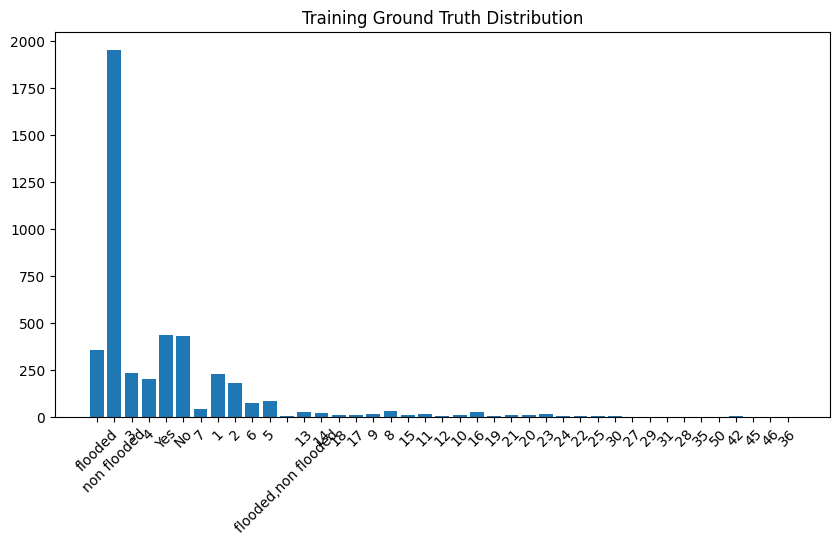

In [ ]:
# Display ground truth distribution for training set
train_ground_truth_distribution = get_ground_truth_distribution(questions['train'])
plt.figure(figsize=(10, 5))
plt.bar(list(map(str, train_ground_truth_distribution.keys())), train_ground_truth_distribution.values())  # Convert keys to list of strings
plt.title('Training Ground Truth Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check image properties (dimensions, color channels)
def check_image_properties(image_folder):
    dimensions = []
    for image_id in os.listdir(image_folder)[:100]:  # Check first 100 images
        image_path = os.path.join(image_folder, image_id)
        img = mpimg.imread(image_path)
        dimensions.append(img.shape)
    return dimensions

In [ ]:
# Display image properties for each set
for key in image_folders.keys():
    dimensions = check_image_properties(image_folders[key])
    print(f'{key.capitalize()} Image Dimensions:', Counter(dimensions))

Train Image Dimensions: Counter({(3000, 4000, 3): 99, (3072, 4592, 3): 1})
Valid Image Dimensions: Counter({(3072, 4592, 3): 58, (3000, 4000, 3): 42})
Test Image Dimensions: Counter({(3072, 4592, 3): 59, (3000, 4000, 3): 41})
